# Hierarichical Clustering

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("D:\ML training\python\Wholesale customers data.csv")

In [4]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Scaling the data (normalize the data)

In [11]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


- as we see that now our data is scaled and come within the range of 0 to 1

#### Plot Dendrogram

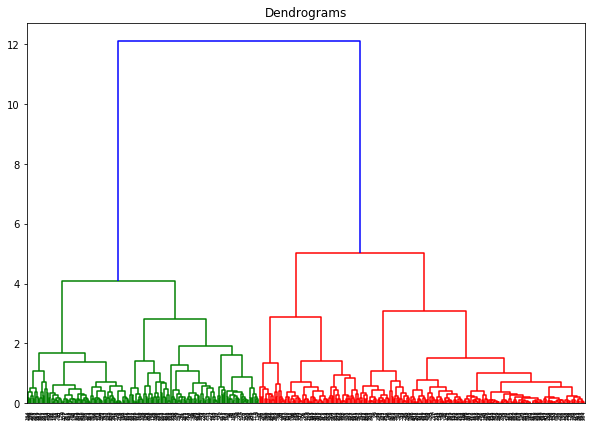

In [12]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize= (10,7))
plt.title('Dendrograms')
dend = shc.dendrogram(shc.linkage(data_scaled,method = 'ward'))

#### Draw the threshold line

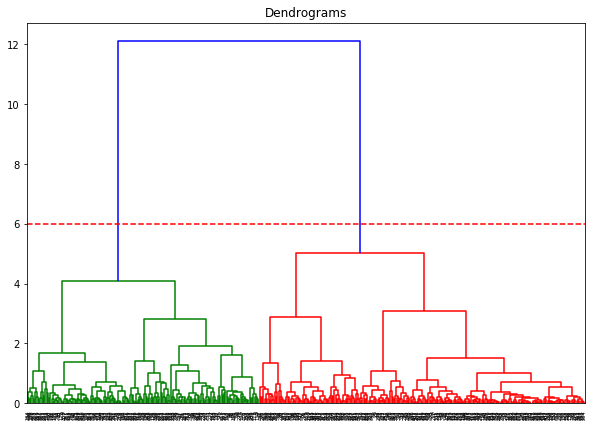

In [23]:
plt.figure(figsize =(10,7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method = 'ward'))
plt.axhline(y = 6, color = 'r', linestyle = '--')

- two cluster in this dendrogram depending on the value of threshold

#### Predict which data belongs to which cluster

In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean' , linkage = 'ward')
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

#### So what are the data points we are having on the basis of two features(milk and grocery) we have ploted this 

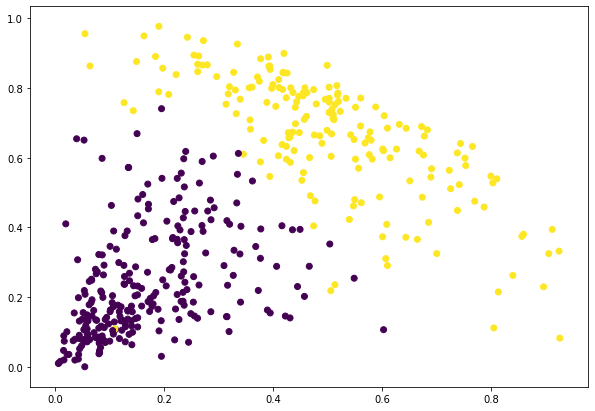

In [25]:
plt.figure(figsize = (10,7))
plt.scatter(data_scaled['Milk'],data_scaled['Grocery'], c = cluster.labels_)

- why we take two clusters??
- becoz as we divide so on the basis of dendrogram we have two clusters

#### If we take threshold value is 3.5

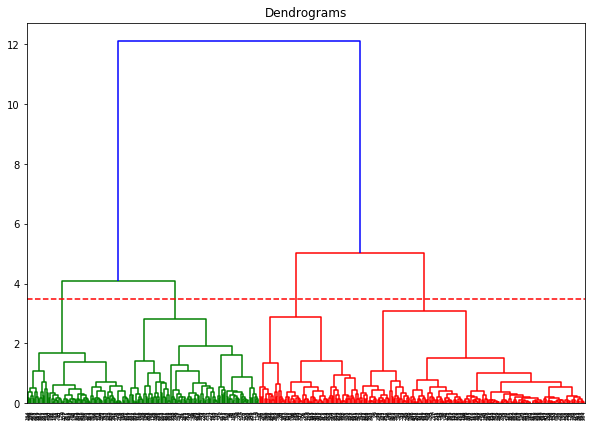

In [19]:
plt.figure(figsize =(10,7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method = 'ward'))
plt.axhline(y = 3.5, color = 'r', linestyle = '--')

- now we have 4 clusters

In [21]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean' , linkage = 'ward')
cluster.fit_predict(data_scaled)

array([1, 1, 1, 2, 0, 1, 0, 1, 1, 3, 3, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 3,
       1, 1, 3, 1, 1, 3, 2, 1, 0, 3, 0, 1, 3, 1, 0, 1, 0, 1, 1, 1, 2, 3,
       3, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 1, 0, 3, 1, 0, 0, 3, 1, 0,
       2, 0, 0, 2, 1, 2, 1, 3, 3, 2, 2, 2, 1, 3, 1, 0, 0, 0, 3, 1, 1, 3,
       0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1,
       0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 1, 1, 1, 1, 0, 2, 3, 1, 3, 3, 3, 3,
       0, 0, 0, 1, 0, 0, 3, 1, 3, 2, 2, 3, 1, 1, 2, 0, 0, 3, 0, 2, 2, 3,
       2, 0, 3, 3, 0, 3, 3, 3, 0, 1, 3, 3, 0, 3, 0, 1, 3, 3, 3, 0, 3, 2,
       0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 3, 0, 0, 0, 2, 2, 3, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 3,
       3, 1, 3, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 3, 1, 0, 0, 0, 0, 1, 3, 0,

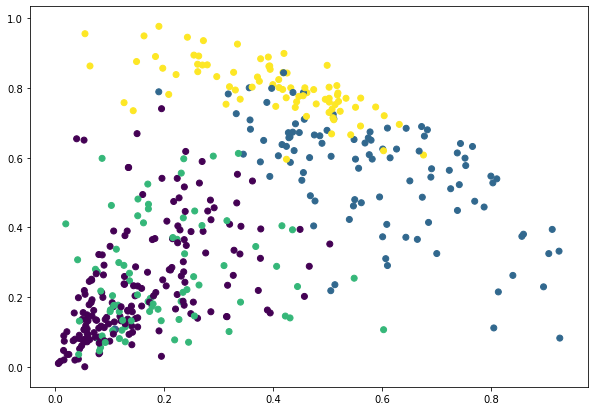

In [22]:
plt.figure(figsize = (10,7))
plt.scatter(data_scaled['Milk'],data_scaled['Grocery'], c = cluster.labels_)

### Conclusion:

#### so we can take different value of threshold and depending on threshold value ous cluster is also change but the optimal cluster for this data is 2 becoz in case of 2 cluster we can easily visualize the both clusters